# **🕸️ Web Scraping with Selenium and Beautiful Soup**

In [1]:
from helpers import *
import pandas as pd
from time import sleep
import numpy as np
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.common.keys import Keys
from IPython import display

In [2]:
url = 'https://www.sciencefocus.com/nature/why-do-we-find-puppies-so-cute/'

In [3]:
driver = webdriver.Chrome()
driver.get(url)
sleep(5)
html_data = driver.page_source

### **Making soup**

In [4]:
soup = BeautifulSoup(html_data, 'html.parser')

### **Getting the title**

In [5]:
type(soup.find_all('h1'))

bs4.element.ResultSet

In [6]:
title = soup.find_all('h1')[0].text
title

'Why do we find puppies so cute?'

### **Getting the author**

In [7]:
author = soup.find_all('a', {'class': 'link link--styled'})[0].text
author

'Christian Jarrett'

In [8]:
for div in soup.find_all('div', {'class': 'post__content'}):
	article_text = div.text

In [9]:
article_text

'Asked by: Arnold Hopper, SwanseaAdvertisementWith their big, round eyes, button noses and large heads, puppies share many of the same physical characteristics as human babies. And like babies, as well as kittens, teddies and many cartoon characters, puppies provoke in us an automatic ‘cute response’. They grab our attention, we enjoy looking at them and, at a neural level, they trigger activity associated with reward and also compassion and empathy.In humans, and other animals, this response is an evolved, innate behaviour that motivates adults to look after helpless infants, and to be more sensitive to their needs and feelings. It makes sense, then, that a recent study found that puppies reach peak cuteness at eight weeks of age, just the time when their canine mothers leave them to fend for themselves.Read more:\nDo babies have nightmares?\nIs stroking good for pets?\nAdvertisementSubscribe to BBC Focus magazine for fascinating new Q&As every month and follow @sciencefocusQA on Twit

In [10]:
article_text = article_text.replace('\n', ' ')

In [11]:
article_text

'Asked by: Arnold Hopper, SwanseaAdvertisementWith their big, round eyes, button noses and large heads, puppies share many of the same physical characteristics as human babies. And like babies, as well as kittens, teddies and many cartoon characters, puppies provoke in us an automatic ‘cute response’. They grab our attention, we enjoy looking at them and, at a neural level, they trigger activity associated with reward and also compassion and empathy.In humans, and other animals, this response is an evolved, innate behaviour that motivates adults to look after helpless infants, and to be more sensitive to their needs and feelings. It makes sense, then, that a recent study found that puppies reach peak cuteness at eight weeks of age, just the time when their canine mothers leave them to fend for themselves.Read more: Do babies have nightmares? Is stroking good for pets? AdvertisementSubscribe to BBC Focus magazine for fascinating new Q&As every month and follow @sciencefocusQA on Twitter

---

## **Google Search**

In [12]:
url = 'https://google.com'
driver = webdriver.Chrome()
driver.get(url)

In [13]:
search_field = driver.find_element(By.NAME, 'q')

In [14]:
search_field.send_keys('Why are dogs so cute?')
search_field.send_keys(Keys.ENTER) 

In [15]:
html_data = driver.page_source

In [16]:
soup = BeautifulSoup(html_data, 'html.parser')

### **Getting All Article Titles**

In [17]:
[title.text for title in soup.find_all('h3')]

['The Scientific Reason Behind Why We Find Dogs So Cute',
 'Curious Kids: Why is our dog so cute? - The Conversation',
 'The Science of Cute: How Cuteness Makes Us Love Our Dogs',
 "Why Are Dogs So Cute? - Dogs 'N Stuff",
 'Why is my dog so cute? | Ohio Wesleyan University',
 'Science Explains What Makes Your Dog So Cute - WSJ',
 'Why do we find puppies so cute? - BBC Science Focus',
 'What makes a dog cute to a human being? - Quora',
 'Why Are Puppies So Cute? | Psychology Today',
 "What Your Dog's Cute Behaviors Really Mean",
 'More results',
 'Try again']

### **Drop the two non-titles from the end of the list**

In [18]:
titles = [title.text for title in soup.find_all('h3')][:14]

In [19]:
titles

['The Scientific Reason Behind Why We Find Dogs So Cute',
 'Curious Kids: Why is our dog so cute? - The Conversation',
 'The Science of Cute: How Cuteness Makes Us Love Our Dogs',
 "Why Are Dogs So Cute? - Dogs 'N Stuff",
 'Why is my dog so cute? | Ohio Wesleyan University',
 'Science Explains What Makes Your Dog So Cute - WSJ',
 'Why do we find puppies so cute? - BBC Science Focus',
 'What makes a dog cute to a human being? - Quora',
 'Why Are Puppies So Cute? | Psychology Today',
 "What Your Dog's Cute Behaviors Really Mean",
 'More results',
 'Try again']

### **Remove the 4 extra titles between header article and other articles**

In [20]:
del titles[1:5]

In [21]:
titles

['The Scientific Reason Behind Why We Find Dogs So Cute',
 'Science Explains What Makes Your Dog So Cute - WSJ',
 'Why do we find puppies so cute? - BBC Science Focus',
 'What makes a dog cute to a human being? - Quora',
 'Why Are Puppies So Cute? | Psychology Today',
 "What Your Dog's Cute Behaviors Really Mean",
 'More results',
 'Try again']

### **Getting head article**

In [22]:
articles = []

In [23]:
len(soup.find_all('div', {'class': 'xpdopen'}))

1

In [24]:
articles.append(soup.find_all('div', {'class': 'xpdopen'})[0].find_all('a')[0]['href'])

soup.find_all('div', {'class': 'xpdopen'})[0].find_all('a')[0]['href']

'https://www.dabl.com/dabl-home/dabl-home/articles/scientific-reason-behind-why-we-find-dogs-so-cute#:~:text=In%20the%20past%2C%20research%20suggested,dogs%20are%20a%20perfect%20example.'

### **Getting the rest of the articles**

In [25]:
len(soup.find_all('div', {'data-header-feature': '0'}))

9

In [26]:
soup.find_all('div', {'data-header-feature': '0'})[0].find_all('a')[0]['href']

'https://theconversation.com/curious-kids-why-is-our-dog-so-cute-138035'

In [27]:
soup.find_all('div', {'data-header-feature': '0'})[1].find_all('a')[0]['href']

'https://www.rover.com/blog/science-cute-dogs/'

In [28]:
soup.find_all('div', {'data-header-feature': '0'})[2].find_all('a')[0]['href']

'https://dogsnstuff.net/why-are-dogs-so-cute/'

In [29]:
for article in soup.find_all('div', {'data-header-feature': '0'}):
	articles.append(article.find_all('a')[0]['href'])

In [30]:
articles

['https://www.dabl.com/dabl-home/dabl-home/articles/scientific-reason-behind-why-we-find-dogs-so-cute#:~:text=In%20the%20past%2C%20research%20suggested,dogs%20are%20a%20perfect%20example.',
 'https://theconversation.com/curious-kids-why-is-our-dog-so-cute-138035',
 'https://www.rover.com/blog/science-cute-dogs/',
 'https://dogsnstuff.net/why-are-dogs-so-cute/',
 'https://www.owu.edu/news-media/from-our-perspective/why-is-my-dog-so-cute/',
 'https://www.wsj.com/story/national-dog-day-what-makes-your-pup-so-cute-its-all-in-the-eyebrows-feff3811',
 'https://www.sciencefocus.com/nature/why-do-we-find-puppies-so-cute/',
 'https://www.quora.com/What-makes-a-dog-cute-to-a-human-being',
 'https://www.psychologytoday.com/us/blog/thinking-about-kids/202003/why-are-puppies-so-cute',
 'https://vcahospitals.com/know-your-pet/what-your-dogs-cute-behaviors-really-mean']

### **Combine article titles and urls as a dataframe**

In [31]:
articles_df = pd.concat([pd.Series(titles), pd.Series(articles)], axis = 1)
articles_df.columns = ['title', 'url']
articles_df

,title,url
0,The Scientific Reason Behind Why We Find Dogs ...,https://www.dabl.com/dabl-home/dabl-home/artic...
1,Science Explains What Makes Your Dog So Cute -...,https://theconversation.com/curious-kids-why-i...
2,Why do we find puppies so cute? - BBC Science ...,https://www.rover.com/blog/science-cute-dogs/
3,What makes a dog cute to a human being? - Quora,https://dogsnstuff.net/why-are-dogs-so-cute/
4,Why Are Puppies So Cute? | Psychology Today,https://www.owu.edu/news-media/from-our-perspe...
5,What Your Dog's Cute Behaviors Really Mean,https://www.wsj.com/story/national-dog-day-wha...
6,More results,https://www.sciencefocus.com/nature/why-do-we-...
7,Try again,https://www.quora.com/What-makes-a-dog-cute-to...
8,NaN,https://www.psychologytoday.com/us/blog/thinki...
9,NaN,https://vcahospitals.com/know-your-pet/what-yo...


### **Scraping the first article in the dataframe**

In [32]:
url = articles_df.iloc[0].url

In [33]:
driver = webdriver.Chrome()
driver.get(url)
html_data = driver.page_source
soup = BeautifulSoup(html_data, 'html.parser')

### **The title**

In [34]:
title = soup.find_all('h1')[0].text
title

'The Scientific Reason Behind Why We Find Dogs So Cute '

### **What can be found in the meta data?**

In [35]:
soup.find_all('meta')

[<meta content="#e70058" name="theme-color"/>,
 <meta content="width=device-width" name="viewport"/>,
 <meta charset="utf-8"/>,
 <meta content="max-image-preview:large" name="robots"/>,
 <meta content="summary_large_image" name="twitter:card"/>,
 <meta content="The Scientific Reason Behind Why We Find Dogs So Cute " name="description"/>,
 <meta content="https://www.dabl.com/dabl-home/dabl-home/articles/scientific-reason-behind-why-we-find-dogs-so-cute" property="og:url"/>,
 <meta content="The Scientific Reason Behind Why We Find Dogs So Cute " property="og:title"/>,
 <meta content="https://api.dabl.com/sites/default/files/styles/video_1280x720/public/images/2022-05/istock-1170679242.jpg?h=c549983f" property="og:image"/>,
 <meta content="The Scientific Reason Behind Why We Find Dogs So Cute " property="og:description"/>,
 <meta content="https://www.dabl.com/dabl-home/dabl-home/articles/scientific-reason-behind-why-we-find-dogs-so-cute" name="twitter:url"/>,
 <meta content="1280" name="t

### **Title via meta data**

In [36]:
title_metadata = [x.attrs for x in soup.find_all('meta') if 'og:title' in list(x.attrs.values())]
title = title_metadata[0]['content']
title

'The Scientific Reason Behind Why We Find Dogs So Cute '

### **URL via meta data**

In [37]:
url_metadata = [x.attrs for x in soup.find_all('meta') if 'og:url' in list(x.attrs.values())]
url = url_metadata[0]['content']
url

'https://www.dabl.com/dabl-home/dabl-home/articles/scientific-reason-behind-why-we-find-dogs-so-cute'

In [38]:
display.IFrame(url, '100%', 400)

### **Image via meta data**

In [39]:
image_metadata = [x.attrs for x in soup.find_all('meta') if 'og:image' in list(x.attrs.values())]
image = image_metadata[0]['content']
image

'https://api.dabl.com/sites/default/files/styles/video_1280x720/public/images/2022-05/istock-1170679242.jpg?h=c549983f'

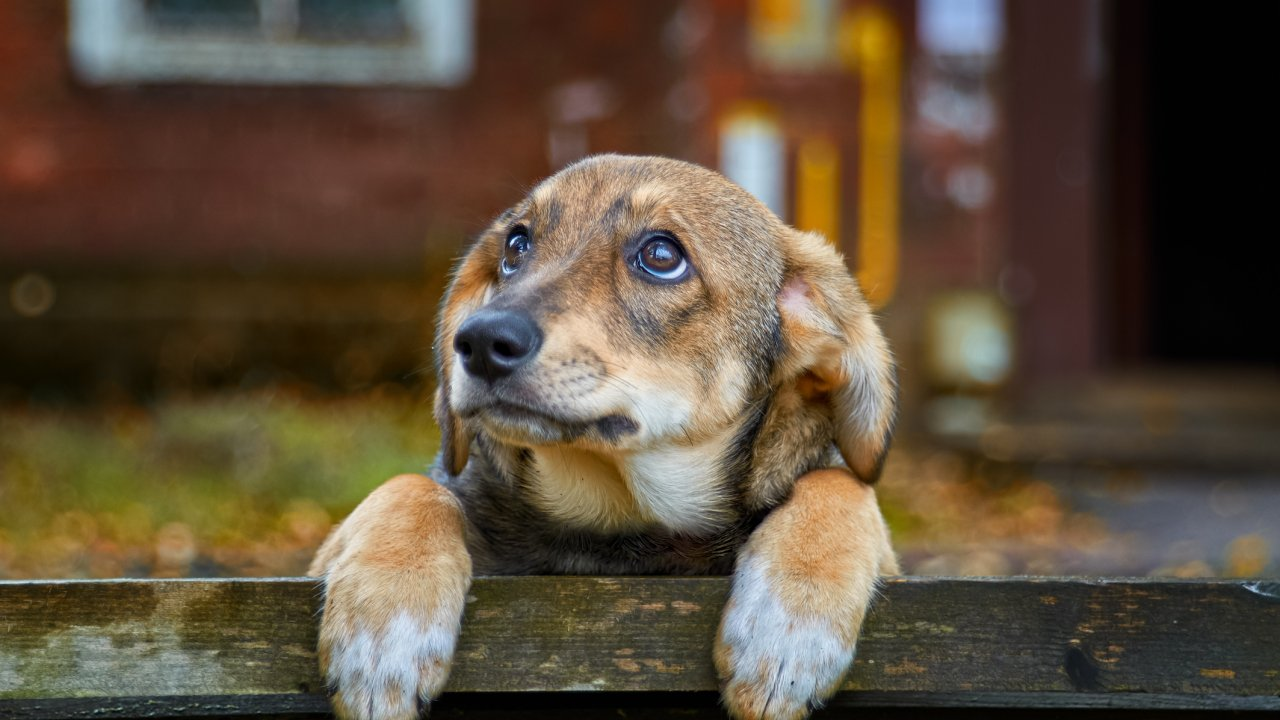

In [40]:
display.Image(data=image.replace('?h=c549983f', ''), 
			  width = 600)

### **Getting author data**

In [41]:
soup.find_all('div', {'class': 'content__presented-by'})[0]

<div class="content__presented-by"><div class="content__show-badge"><img alt="Dabl At Home Dec 2020" height="144" src="https://api.dabl.com/sites/default/files/styles/144x144/public/images/2020-12/DablAtHome_0.jpg?h=df1a205b" width="144"/></div><div>Presented By<br/><span>Dabl at Home</span></div></div>

In [42]:
author = soup.find_all('div', {'class': 'content__presented-by'})[0]\
						       .text.replace('Presented By', '')
author

'Dabl at Home'

### **First method of getting article text**

In [43]:
article_text = soup.find_all('div', 
							 {'class': 'content__body-main'})[0]\
							  .get_text(strip=True).replace('\u200b', '')

### **Second method of getting article text**

In [44]:
article_text = ' '.join([p.get_text(strip=True) for p in soup.find_all('p')])
article_text

'It’s no secret that dogs are adorable, and most pet owners would argue that their furry friend is the cutest in existence! But have you ever wondered what it is about your dog’s appearance that makes him so irresistible? Scientists have recently uncovered a genetic reason behind your fur baby’s endearing puppy dog eyes, but we’re going to have to go back in time many years to fully explain it. It’s thought that our bond with wolves — the ancestors of domesticated dogs — began approximately 40,000 years when most humans lived as hunter-gatherers. Dogs weren’t born until humans startedselectively breeding wolves with the most desirable traits an estimated 33,000 years agoto act as their companions. Thus, the dogs we know and love today were born and man gained a new best friend, forming a bond between our species that has withstood thousands of years. But anew studyhas found that humanity has imparted more on dogs than we initially realized, and it’s a key factor in why we find them so 

In [45]:
article = pd.DataFrame([title, author, article_text]).T
article.columns = ['title', 'author', 'article_text']
article

,title,author,article_text
0,The Scientific Reason Behind Why We Find Dogs ...,Dabl at Home,"It’s no secret that dogs are adorable, and mos..."
